In [1]:
import delfi.distribution as dd
import delfi.generator as dg
import delfi.inference as infer
import delfi.summarystats as ds
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from delfi.simulator.Gauss import Gauss

n_params = 2

m = Gauss(dim=n_params)
p = dd.Gaussian(m=np.zeros((n_params, )), S=np.eye(n_params))
s = ds.Identity()
g = dg.Default(model=m, prior=p, summary=s)

_, obs = g.gen(1)

# set up inference
res = infer.SNPE(g, obs=obs, n_components=2)
#res = infer.Basic(g)

# run with N samples
out = res.run(100, n_rounds=2)

Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


In [2]:
%debug

> /Users/jm/repos/delfi/delfi/inference/CDELFI.py(39)__init__()
     37         # Algorithm 1 of PM requires a single component
     38         kwargs = kwargs.update({'n_components': 1})
---> 39         super().__init__(generator, seed, **kwargs)
     40 
     41         self.n_components = n_components

ipdb> kwargs
ipdb> 00q
*** SyntaxError: invalid syntax
ipdb> q


In [2]:
%debug

> /Users/jm/repos/delfi/delfi/inference/CDELFI.py(38)__init__()
     36         """
     37         # Algorithm 1 of PM requires a single component
---> 38         x
     39         kwargs = kwargs.update({'n_components': 1})
     40         super().__init__(generator, seed, **kwargs)

ipdb> kwargs
{'n_hiddens': [10]}
ipdb> q


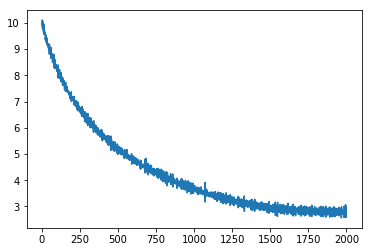

In [5]:
out = out[-1]
plt.plot(out['trn_iter'], out['trn_val'])

In [6]:
posterior = res.predict(np.array([[0., 0.]]))

In [7]:
posterior.xs[0].m

array([ 0.04607499, -0.10893019], dtype=float32)

In [8]:
posterior.xs[0].S

array([[ 0.96105415, -0.0412662 ],
       [-0.0412662 ,  0.94054484]], dtype=float32)